# Практическая работа №5
## Анализ тональности текста
## Королев Павел Александрович

# Цель:
знакомство с методами анализа текстовых данных в
рамках решения задачи анализа текстовых данных, формирование
навыков выполнения анализа данных на языке Python.

# Задачи:
Выполнение практической работы предполагает решение
следующий задач:
1. Подготовка исходных данных
2. Обучение базовых моделей классификации
3. Оценка качества построенных моделей на тестовой выборке

In [1]:
import numpy as np
import pandas as pd
from statistics import mean

In [2]:
text_data = pd.read_excel('doc_comment_summary.xlsx', header=None, names=['text', 'rating'])
text_data.head()

text rating
0  Но при мужчине ни одна приличная женщина не по...     -1
1  Украина это часть Руси искусственно отделенная...     -1
2  Как можно говорить об относительно небольшой к...     -1
3  1.2014.  а что они со своими поляками сделали?...      0
4  у а фильмы... Зрители любят диковинное.   у ме...      0

In [3]:
words_rating = pd.read_excel('full word_rating_after_coding.xlsx', header=None, names=['word', 'rating'])
words_rating.head()

word  rating
0    абажур       0
1    абажур       0
2    абажур      -1
3  абориген      -1
4  абориген      -1

### Обработка данных

In [4]:
splited_text = text_data.copy(deep=True)

In [5]:
splited_text.loc[(splited_text.rating == -2), 'rating'] = -1
splited_text.loc[(splited_text.rating == 2), 'rating'] = 1

In [6]:
alphabets_in_lowercase = 'й ц у к е н г ш щ з х ъ ф ы в а п р о л д ж э я ч с м и т ь б ю'
alphabets_in_lowercase = alphabets_in_lowercase.split(' ')
alphabets_in_lowercase.append(' ')
alphabets_in_lowercase.append('\n')
alphabets_in_lowercase.append('\f')
alphabets_in_lowercase.append('\r')
alphabets_in_lowercase.append('\t')
alphabets_in_lowercase.append('\v')

def symbol_del(text):
    out_text = ''
    for symbol in text:
        if symbol not in alphabets_in_lowercase:
            out_text = out_text + ' '
        else:
            out_text = out_text + symbol
    return out_text

In [7]:
for i, text, trash in text_data.itertuples():
    try:
        splited = text.lower()
        splited = symbol_del(splited)
        splited = splited.split()
        splited_text.loc[i, 'text'] = splited
    except:
        splited_text.drop(index=i)
        
splited_text.head()

text rating
0  [но, при, мужчине, ни, одна, приличная, женщин...     -1
1  [украина, это, часть, руси, искусственно, отде...     -1
2  [как, можно, говорить, об, относительно, небол...     -1
3  [а, что, они, со, своими, поляками, сделали, р...      0
4  [у, а, фильмы, зрители, любят, диковинное, у, ...      0

In [26]:
splited_text.rating.unique()

array([-1, 0, 1, nan, 'Виталия Салина', 'Арина Макковеева',
       'Yudenkova Dasha', 'GalinaPozd', 21887, 'Анна Вейдер', 22158,
       23486, 'Минченкова Елизавета ', 'Иван Мишалкин ', 'Анна Аникина',
       23523], dtype=object)

### Токинизируем

In [8]:
import razdel
from nltk.corpus import stopwords

In [9]:
russian_stopwords = stopwords.words('russian')

In [10]:
for i, text, trash in splited_text.itertuples():
    try:
        tokinazed = []
        for j in text:
            word = list(razdel.tokenize(j))
            if word[0].text not in russian_stopwords:
                tokinazed.append(word[0].text)
        splited_text.loc[i, 'text'] = tokinazed
    except:
        splited_text.drop(index=i)
        
splited_text

text rating
0      [мужчине, одна, приличная, женщина, пойдет, ла...     -1
1      [украина, это, часть, руси, искусственно, отде...     -1
2      [говорить, относительно, небольшой, коррупции,...     -1
3      [своими, поляками, сделали, русских, понятно, ...      0
4      [фильмы, зрители, любят, диковинное, соседка, ...      0
...                                                  ...    ...
26868  [многих, заставляют, многие, сами, проявляют, ...     -1
26869  [очередной, чубайс, нового, сорос, х, дал, исч...     -1
26870  [закон, предыдущие, абсолютный, бред, нежелани...      0
26871  [дело, которое, делаешь, оно, очень, хорошее, ...      0
26872  [рядом, токио, мало, пальм, зато, окинаве, омг...      0

[26873 rows x 2 columns]

### Чищу рейтинг 

In [11]:
clear_rating = words_rating.copy(deep=True)
words_dict = {}
for i, word, rating in words_rating.itertuples():
    if word in words_dict.keys():
        words_dict[word].append(rating)
    else:
        words_dict[word] = [rating]
for word in words_dict.keys():
    words_dict[word] = round(mean(words_dict[word]), 3)

### Векторизация

In [12]:
vectored_text = splited_text.copy(deep=True)
vectored_text = vectored_text.dropna()

In [13]:
all_texts = []
for i, text, trash in vectored_text.itertuples():
    try:
        all_texts.append(" ".join(text))
    except:
        vectored_text = vectored_text.drop(index=i)
print(len(all_texts))

26752


##### TF-IDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [39]:
vectorizer = TfidfVectorizer(min_df=300)

In [86]:
y = vectored_text.rating
y = pd.to_numeric(y, errors='coerce')

In [41]:
X = vectorizer.fit_transform(all_texts)
X = X.toarray()

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Word2Vec

In [19]:
from gensim.models import word2vec

In [20]:
vectorizer_w2v = word2vec.Word2Vec(all_texts, workers=4, vector_size=300, min_count=5, window=10, sample=1e-3)

In [21]:
w2v = []
for t in all_texts:
    mean_vector = np.zeros(300)
    c = 0
    for w in t:
        try:
            mean_vector += vectorizer_w2v.wv.get_vector(w)
            c += 1
        except KeyError:
            continue

    w2v.append(np.array(mean_vector/c))

In [22]:
w2v = np.array(w2v)
w2v

array([[ 1.30123263e-01, -7.98009759e-03,  1.88663801e-03, ...,
        -3.54381893e-02, -5.46830006e-02, -2.22794971e-02],
       [ 6.43318834e-02,  3.58238589e-02, -5.63451313e-02, ...,
        -7.06152256e-03, -8.61613909e-05, -7.82306267e-03],
       [ 9.36153854e-02,  5.69273995e-02, -2.42400308e-03, ...,
         4.44207113e-03,  3.63762869e-03, -2.59790589e-02],
       ...,
       [ 1.12341094e-01,  5.70947737e-02,  1.03962756e-02, ...,
         1.13055082e-02, -8.97300626e-03,  3.25587805e-03],
       [ 8.40876463e-02,  4.25130007e-02, -2.52772989e-02, ...,
         7.95531811e-03,  1.56340377e-04,  1.67800036e-02],
       [ 7.63425143e-02,  6.77033606e-02,  1.18012657e-02, ...,
        -5.16256603e-03, -2.29072994e-02,  6.35474416e-04]])

In [23]:
X_train_w2v, X_test_w2v, Y_train_w2v, Y_test_w2v = train_test_split(w2v, y, test_size=0.2, random_state=0)

### Классифицирую

In [43]:
from sklearn.metrics import plot_confusion_matrix

Функция глупой оценки модели

In [44]:
def ansver_checker(test, val_pred):
    test = test.to_list()
    total = 0
    for i in range(len(test)):
        if test[i] == y_val_pred[i]:
            total += 1
    mean = total/(len(test))
    return mean

#### LogisticRegression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train, Y_train)

LogisticRegression(max_iter=300)

In [47]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_test)

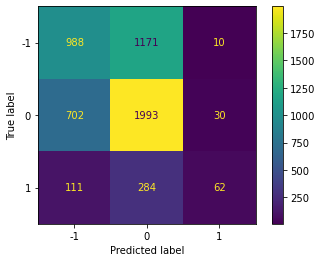

In [48]:
plot_confusion_matrix(lr, X_test, Y_test)

In [49]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.5686787516352084

word2vec

In [50]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train_w2v, Y_train_w2v)

LogisticRegression(max_iter=300)

In [51]:
y_train_pred = lr.predict(X_train_w2v)
y_val_pred = lr.predict(X_test_w2v)

In [52]:
plot_confusion_matrix(lr, X_test_w2v, Y_test_w2v)

In [53]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.5148570360680247

Чтож, ошибок меньше чем правильных значений

#### Наивный баесовский метод

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)

GaussianNB()

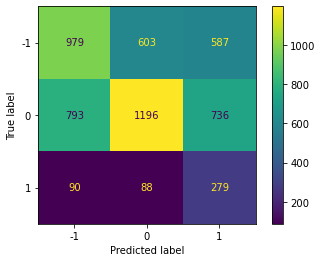

In [56]:
y_train_pred = GNB.predict(X_train)
y_val_pred = GNB.predict(X_test)
plot_confusion_matrix(GNB, X_test, Y_test)

In [57]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.45860586806204445

Можно заметить, результат будет похуже

word2vec

In [58]:
GNB = GaussianNB()
GNB.fit(X_train_w2v, Y_train_w2v)

GaussianNB()

In [59]:
y_train_pred = GNB.predict(X_train_w2v)
y_val_pred = GNB.predict(X_test_w2v)

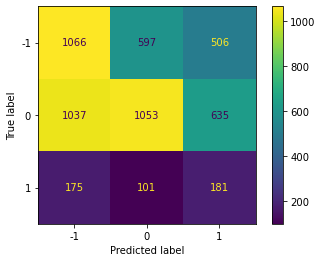

In [60]:
plot_confusion_matrix(GNB, X_test_w2v, Y_test_w2v)

In [61]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.42982620071014765

#### Дерево решений

In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)

DecisionTreeClassifier()

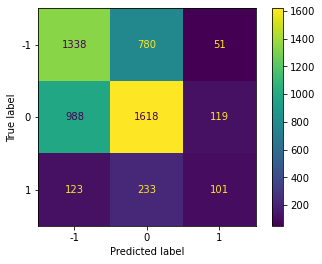

In [64]:
y_train_pred = DTC.predict(X_train)
y_val_pred = DTC.predict(X_test)
plot_confusion_matrix(DTC, X_test, Y_test)

In [65]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.5712950850308354

word2vec

In [66]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train_w2v, Y_train_w2v)

DecisionTreeClassifier()

In [67]:
y_train_pred = DTC.predict(X_train_w2v)
y_val_pred = DTC.predict(X_test_w2v)

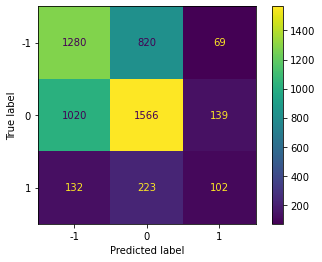

In [68]:
plot_confusion_matrix(DTC, X_test_w2v, Y_test_w2v)

In [69]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.550925060736311

#### RandomForestClassifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

RandomForestClassifier()

In [72]:
y_train_pred = RFC.predict(X_train)
y_val_pred = RFC.predict(X_test)
plot_confusion_matrix(RFC, X_test, Y_test)

In [73]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.5903569426275462

word2vec

In [74]:
RFC = RandomForestClassifier()
RFC.fit(X_train_w2v, Y_train_w2v)

RandomForestClassifier()

In [75]:
y_train_pred = RFC.predict(X_train_w2v)
y_val_pred = RFC.predict(X_test_w2v)

In [76]:
plot_confusion_matrix(RFC, X_test_w2v, Y_test_w2v)

In [77]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.5811997757428518

#### GradientBoostingClassifier

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train, Y_train)

GradientBoostingClassifier()

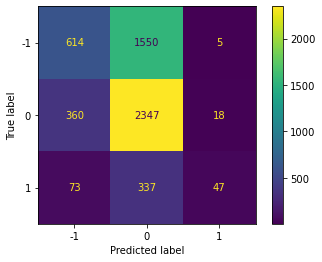

In [93]:
y_train_pred = GBC.predict(X_train)
y_val_pred = GBC.predict(X_test)
plot_confusion_matrix(GBC, X_test, Y_test)

In [94]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.5621379181461409

word2vec

In [95]:
GBC = GradientBoostingClassifier()
GBC.fit(X_train_w2v, Y_train_w2v)

GradientBoostingClassifier()

In [96]:
y_train_pred = GBC.predict(X_train_w2v)
y_val_pred = GBC.predict(X_test_w2v)

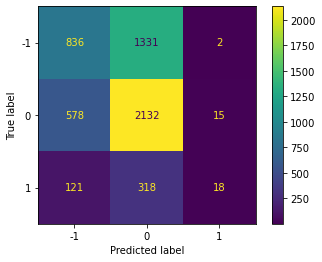

In [97]:
plot_confusion_matrix(GBC, X_test_w2v, Y_test_w2v)

In [98]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.5580265370958699

#### SVM

In [104]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(cache_size=7000)
svc.fit(X_train, Y_train)

In [ ]:
y_train_pred = svc.predict(X_train)
y_val_pred = svc.predict(X_test)
plot_confusion_matrix(svc, X_test, Y_test)

word2vec

In [ ]:
svc = SVC(cache_size=7000)
svc.fit(X_train_w2v, Y_train_w2v)

In [ ]:
y_train_pred = svc.predict(X_train_w2v)
y_val_pred = svc.predict(X_test_w2v)

In [ ]:
plot_confusion_matrix(svc, X_test_w2v, Y_test_w2v)

In [ ]:
mean = ansver_checker(Y_test, y_val_pred)
mean

Чет так лень ее обучать

### Подход на основе тонального словаря

In [78]:
all_texts_2 = []
for i, text, trash in vectored_text.itertuples():
    all_texts_2.append(text)
all_texts[:2]

['мужчине одна приличная женщина пойдет лазить распродажам дураком муж считает жена покупающая вещи распродаже дешевая шлюха имеет такую жену которая это терпит врет врать вредно состояния души страдает безусловно жена хуже дурак миллионеры могут это позволить',
 'украина это часть руси искусственно отделенная которой русских людей течении лет переформатируют мозги против россии вали отсюда нахуй израильский чурка хотят хохлы частью рашкостана кавказороссиянии нужна хохлам духовная общность черножопыми дикарями москвабадской красной площади новый год одни чурки одной русской рожи хохлы хотят такого обезьянника киеве лет братские украинцы будут срать русских говнорашку поляки русские будут смешиваться чурками растворяться чурках']

In [79]:
y_pred = []
i = 0
for text in all_texts:
    summa = 0
    for word in text:
        if word in words_dict.keys():
            summa += words_dict[word]
    if summa > 0:
        y_pred.append(1)
    elif summa <0:
        y_pred.append(-1)
    else:
        y_pred.append(0)

In [87]:
y = y.to_list()

In [89]:
y[:10]

[-1, -1, -1, 0, 0, -1, 0, 0, -1, -1]

In [90]:
total = 0
for i in range(len(y_pred)):
    if y[i] == y_pred[i]:
        total += 1
    mean = total/(len(y))
mean

0.5180173444976076

Хочу лучше

In [100]:
vectorizer = TfidfVectorizer(min_df=50)

y = vectored_text.rating
y = pd.to_numeric(y, errors='coerce')

X = vectorizer.fit_transform(all_texts)
X = X.toarray()

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

RandomForestClassifier()

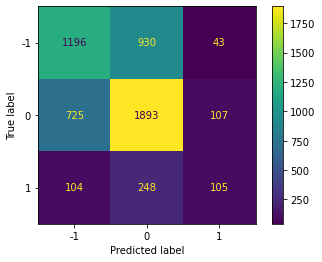

In [102]:
y_train_pred = RFC.predict(X_train)
y_val_pred = RFC.predict(X_test)
plot_confusion_matrix(RFC, X_test, Y_test)

In [103]:
mean = ansver_checker(Y_test, y_val_pred)
mean

0.5968977761166138